In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('ToyotaCorolla.csv')

In [5]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
## PERFORM EDA AND PREPROCESSING

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [19]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [21]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [23]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [25]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

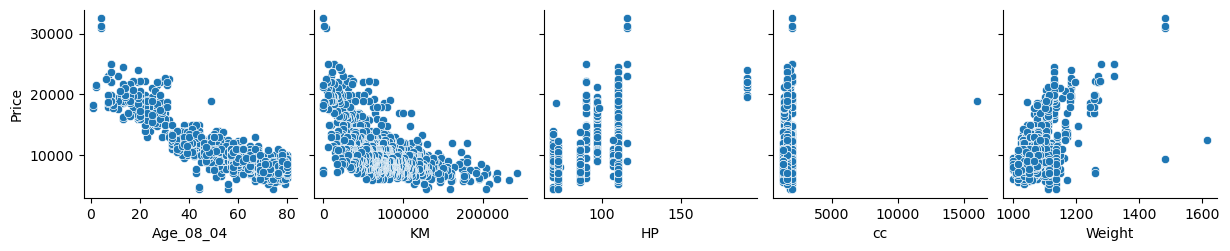

In [27]:
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight'],y_vars='Price')

In [28]:
## for categorical variables

<Axes: xlabel='Fuel_Type', ylabel='count'>

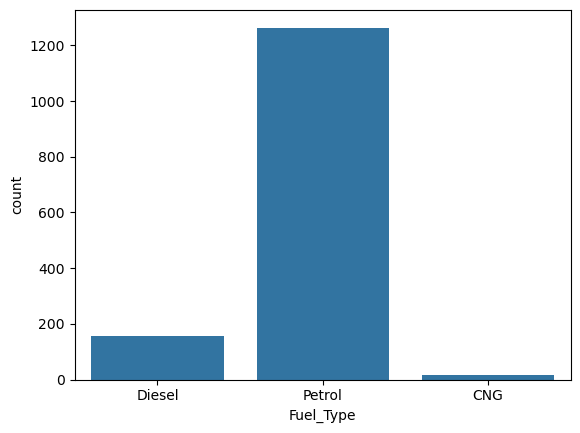

In [29]:
sns.countplot(data=df,x='Fuel_Type')

In [30]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [31]:
## preprocessing- labelEncoder and standardScaler

In [32]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [33]:
LE= LabelEncoder()

In [41]:
LE

LabelEncoder()

In [43]:
df['Fuel_Type']=LE.fit_transform(df['Fuel_Type'])

In [45]:
ss=StandardScaler()

In [47]:
ss

StandardScaler()

In [49]:
df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']]=ss.fit_transform(df[['Age_08_04', 'KM', 'HP', 'cc', 'Automatic','Doors','Cylinders','Gears','Weight']])

In [51]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,-1.771966,-0.574695,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,13750,-1.771966,0.117454,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,13950,-1.718184,-0.715386,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,14950,-1.610620,-0.547650,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,13750,-1.395491,-0.801028,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,10845,0.863362,-1.321120,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,8500,0.809579,-1.374036,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,7250,0.755797,-1.376703,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [53]:
## Split the data set into training and testing data set

In [55]:
features=df.drop('Price',axis=1)

In [57]:
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,-1.771966,0.117454,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,-1.718184,-0.715386,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,-1.610620,-0.547650,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,-1.395491,-0.801028,1,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,0.863362,-1.321120,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,0.809579,-1.374036,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,0.755797,-1.376703,2,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [59]:
target=df['Price']

In [61]:
target

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [63]:

x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=100)

In [65]:
x_train

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1349,0.755797,-0.200922,2,0.567440,-0.242893,0.054555,-0.035099,0.0,-0.140425,-0.711851
857,0.217975,-0.096531,2,0.567440,-0.242893,0.054555,1.014941,0.0,-0.140425,-0.046740
902,0.379322,-0.254265,2,-1.035138,-0.242893,-0.652594,1.014941,0.0,-0.140425,-0.711851
372,-0.857669,-1.373102,2,-0.300623,-0.242893,-0.416878,1.014941,0.0,-0.140425,-0.236772
1377,0.917144,-0.326091,2,0.567440,-0.242893,0.054555,-1.085139,0.0,-0.140425,-0.426804
...,...,...,...,...,...,...,...,...,...,...
802,0.433104,0.132470,2,0.567440,-0.242893,0.054555,-1.085139,0.0,-0.140425,-0.426804
53,-1.556838,-0.497881,2,6.042918,-0.242893,0.525987,1.014941,0.0,-0.140425,2.328656
350,-0.911451,-1.103215,2,-0.300623,-0.242893,-0.416878,1.014941,0.0,-0.140425,-0.236772
79,-1.395491,-1.241106,2,-0.300623,-0.242893,-0.416878,1.014941,0.0,-0.140425,0.713387


In [67]:
x_test

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
57,-1.610620,-0.681007,2,-0.300623,-0.242893,-0.416878,1.014941,0.0,-0.140425,0.713387
1002,0.540668,-0.783852,2,0.567440,-0.242893,0.054555,-1.085139,0.0,-0.140425,-0.426804
360,-0.911451,-1.175921,2,0.567440,-0.242893,0.054555,-1.085139,0.0,-0.140425,-0.616836
903,0.486886,-0.254265,2,0.567440,-0.242893,0.054555,1.014941,0.0,-0.140425,0.048275
1277,1.239837,0.148286,2,0.567440,-0.242893,0.054555,1.014941,0.0,-0.140425,0.048275
...,...,...,...,...,...,...,...,...,...,...
198,-0.750104,0.991261,2,-0.300623,-0.242893,-0.416878,-1.085139,0.0,-0.140425,-0.901883
67,-1.825749,-1.017066,2,-0.300623,-0.242893,-0.416878,1.014941,0.0,-0.140425,0.713387
517,0.002846,-0.440965,2,-0.300623,-0.242893,-0.416878,-1.085139,0.0,-0.140425,-0.901883
916,0.648233,-0.292539,2,-1.035138,-0.242893,-0.652594,1.014941,0.0,-0.140425,-0.711851


In [69]:
y_train

1349     7150
857      8500
902      9950
372     11950
1377     8750
        ...  
802      9250
53      21950
350     11895
79      14900
792      7750
Name: Price, Length: 1148, dtype: int64

In [71]:
y_test

57      15250
1002     8250
360     12950
903      9750
1277     8800
        ...  
198      9950
67      14950
517     10000
916      7950
108     17950
Name: Price, Length: 288, dtype: int64

In [73]:
from sklearn.linear_model import LinearRegression

In [75]:
LR1=LinearRegression() ## first model=1, for all variables

In [77]:
LR1

LinearRegression()

In [79]:
LR1.fit(x_train,y_train)

LinearRegression()

In [81]:
LR2=LinearRegression() ## second model , without fuel type and automatic 

In [83]:
LR2

LinearRegression()

In [85]:

LR2.fit(x_train.drop(['Fuel_Type','Automatic'],axis=1),y_train)

LinearRegression()

In [87]:
LR3=LinearRegression() ## third model , without age type and KM 

In [89]:
LR3.fit(x_train.drop(['Age_08_04','KM'],axis=1),y_train)

LinearRegression()

In [91]:
LR1.coef_

array([-2.25336397e+03, -6.73593648e+02,  8.34410622e+02,  3.46684519e+02,
        6.76972265e+01, -2.28021062e+01, -3.14084620e+01, -2.55795385e-13,
        1.18417732e+02,  1.20097351e+03])

In [93]:
LR2.coef_

array([-2.22455495e+03, -7.87262961e+02,  4.56383560e+02, -3.51000471e+01,
        1.09020611e+00,  5.11590770e-13,  1.18934743e+02,  1.03806148e+03])

In [95]:
LR3.coef_

array([ 3.40781216e+03,  4.04058571e+02, -1.32568832e+02, -1.38650185e+02,
       -1.77012261e+02,  2.27373675e-13, -4.25277696e+01,  2.92639141e+03])

In [97]:
## TO EVALUATE THE PERFOMANCE OF THE MODEL USE MSE AND R Square

In [99]:
from sklearn.metrics import r2_score,mean_squared_error


In [101]:
y_pred1=LR1.predict(x_test)

In [103]:
y_pred1

array([15666.30823307,  9874.76486859, 13182.790862  , 10143.82694303,
        8175.9988158 ,  9542.42534964, 13245.65160137,  5244.22639824,
       13782.7714816 ,  8078.70374422, 14102.93536261,  8765.50364548,
       11928.98214531,  7069.13712445, 17528.18466208,  8381.70036345,
       14054.3952906 , 15737.83114656, 16779.96442366,  9445.50975177,
       11638.65803616,  8523.08749938, 11316.73382598, 10522.9419918 ,
        8195.72077641,  9633.90598885,  8045.20525729,  9085.76436188,
       10827.14184644,  7451.76228412,  8342.73339245, 14087.50982796,
        8481.61755598, 18440.61105526, 10403.25262544,  9000.63844985,
        6143.73725337,  7744.56066214, 11449.24541777, 11217.6387402 ,
        7793.90837765,  8090.54181917,  8821.79824364, 14566.02532416,
        9722.36892496,  9346.59183951, 12132.51870461,  6929.27963854,
       11326.86282029, 15002.11712593, 10690.93745337, 13261.70809902,
       11710.08445694, 13028.37555471, 18314.66851942, 10576.97959015,
      

In [134]:
y_pred2=LR2.predict(x_test.drop(['Fuel_Type','Automatic'],axis=1))

In [136]:
y_pred2

array([15492.75183792,  9981.80432088, 13323.52085313, 10179.97287408,
        8188.07883276,  9334.43614328, 13292.78252924,  5228.91288826,
       13382.86991909,  8030.36427545, 14147.16980135,  8723.05983577,
       11934.11531049,  6762.43093786, 17571.16223204,  8412.78787399,
       14165.70516505, 15632.43622188, 16630.42565143,  9546.11348785,
       11613.82969806,  8427.34179512, 11391.58369707, 10619.25354495,
        9676.07743792,  9650.00379752,  8054.58578423,  8808.15338076,
       10777.38798126,  7332.36170185,  8176.02184525, 14085.14031213,
        8560.83186371, 18339.21186651, 10417.17545855,  9004.169456  ,
        6240.14644959,  7723.90629388, 11471.19009512, 11192.72589162,
        7823.07269852,  8116.49704566,  8858.66655383, 14644.40557189,
        9753.39490467,  9266.73443196, 12218.25174336,  6800.78745584,
       11286.40655364, 15303.84468165, 10881.59966688, 13295.98761641,
       11590.27673851, 13252.20941952, 18388.02598568, 10526.99551101,
      

In [152]:
y_pred3=LR3.predict(x_test.drop(['Age_08_04','KM'],axis=1))

In [154]:
y_pred3

array([13075.86454084, 10396.34519397,  9840.2379421 , 11414.8734775 ,
       11414.8734775 , 11022.75246099, 10674.3988199 ,  9725.29054844,
       12783.25791945, 11414.8734775 , 11414.8734775 , 11414.8734775 ,
       10295.32828153, 11414.8734775 , 10786.23248497, 10396.34519397,
       11692.92710343, 12891.49713509, 12891.49713509, 10396.34519397,
        8998.74637206,  9475.11592558,  8998.74637206,  9376.31439312,
        5007.5619804 , 11414.8734775 ,  7900.48039018, 11004.82846907,
       11004.82846907, 11136.81985157,  8919.00867372, 11414.8734775 ,
       10674.3988199 , 13075.86454084, 11414.8734775 , 10396.34519397,
        6880.44958933,  9447.23692251,  8720.69274613, 10328.01037633,
       10674.3988199 , 10396.34519397,  8640.95504779, 11414.8734775 ,
       11414.8734775 , 11970.98072936, 11414.8734775 ,  8640.95504779,
        9840.2379421 , 14566.11412315,  9376.31439312, 11414.8734775 ,
       10295.32828153,  9098.26076718, 17346.65038246,  8998.74637206,
      

In [156]:
MSE1=mean_squared_error(y_test,y_pred1)

In [158]:
MSE1

1847280.0806321676

In [160]:
R1= r2_score(y_test, y_pred1)


In [162]:
R1

0.8448071658647169

In [168]:
MSE2=mean_squared_error(y_test,y_pred2)

In [170]:
MSE2

1778714.8334037657

In [172]:
R2= r2_score(y_test, y_pred2)


In [174]:
R2

0.8505674374944097

In [180]:
MSE3=mean_squared_error(y_test,y_pred3)

In [183]:
MSE3

8533773.145228298

In [185]:
R3= r2_score(y_test, y_pred3)


In [187]:
R3

0.28306462340982674

In [190]:
## LASSO AND RIDGE METHODS

In [192]:
from sklearn.linear_model import Lasso, Ridge

In [196]:
lasso_model=Lasso(alpha=0.1)

In [198]:
lasso_model

Lasso(alpha=0.1)

In [200]:
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [202]:
lasso_model.coef_

array([-2253.31509084,  -673.74681442,   832.63924565,   346.85975084,
          67.64824341,   -22.71455112,   -31.19339734,     0.        ,
         118.36882603,  1200.43715798])

In [204]:
ridge_model=Ridge(alpha=0.1)

In [206]:
ridge_model

Ridge(alpha=0.1)

In [208]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [210]:
ridge_model.coef_

array([-2253.10874438,  -673.85648641,   832.75179804,   346.88685638,
          67.73617686,   -22.80701475,   -31.29179882,     0.        ,
         118.44546993,  1200.60744377])

## Interview Questions:

In [217]:
# 1)What is Normalization & Standardization and how is it helpful?

## NORMALIZATION:

In [220]:
## Normalization typically refers to the process of scaling data to fit within a specific range, often [0, 1].Improves model training speed and performance


## STANDARDIZATION:

In [223]:
## Standardization, on the other hand, transforms the data to have a mean of 0 and a standard deviation of 1. Handles outliers better than normalization


In [ ]:
## how it helpful

In [225]:
## 1. Improved Model Performance
## 2. Distance-Based Algorithms
## 3. Handling Different Scales
## 4. Robustness to Outliers
## 5. Interpretability

In [ ]:
# 2)What techniques can be used to address multicollinearity in multiple linear regression?

In [ ]:
* Remove Highly Correlated Predictors
* Use Regularization Techniques
* Increase Sample Size
* Center the Variables
* Use Domain Knowledge
* Combine Variables
*7. Dummy Variable Adjustments